In [11]:
%matplotlib inline
from sklearn.datasets import load_iris
from  scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import random, sys
import matplotlib.pyplot as plt
from scipy import ndimage
import cPickle as pickle
import scipy.io.wavfile as wav
from pylab import plt
from scipy.signal import butter, lfilter, freqz
from sklearn.cross_validation import train_test_split
from librosa.util import normalize
import kmeans as km

Homework 4 Experiments
-----------------------------------------------------

# Run regular kmeans
* Run regular kmeans and visualize it


init
Start kmeans


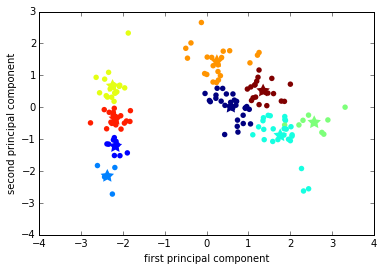

In [13]:
def plotPCA(X, y, centroids):
  pca = PCA()
  pca.fit(X)
  X_pca = pca.transform(X)
  centroids_pca = pca.transform(centroids)
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
  plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], linewidths=0, s=200, marker=(5, 1), c=[i for i in xrange(len(centroids_pca))])
  plt.xlabel('first principal component')
  plt.ylabel('second principal component')
  plt.show()

#Data import and preprocessing
scaler = StandardScaler()
iris = load_iris()
X, y = iris.data, iris.target
scaler.fit(X)
X = scaler.transform(X)
#regular kmeans
kmeans = km.mykmeans(10, 50)
kmeans.mykmeans(X)
centroids = kmeans.centroids()
y = kmeans.getGroup(X)
km.plotPCA(X, y, centroids)


# Run kmeans_multi
* Run kmeans_multi and visualize it


Start kmeans
np.array(centers).shape (10, 4)
centers [array([-0.05250608, -0.8191665 ,  0.1941016 , -0.26119297]), array([-0.90068117,  1.72626612, -1.227541  , -1.31297673]), array([-0.7795133 ,  2.42047502, -1.2844067 , -1.4444497 ]), array([ 1.2803405 ,  0.10644536,  0.76275864,  1.44795564]), array([ 2.24968346, -1.05056946,  1.78634131,  1.44795564]), array([-1.50652052,  0.33784833, -1.3412724 , -1.31297673]), array([-0.41600969, -1.28197243,  0.1372359 ,  0.13322594]), array([-0.53717756,  0.80065426, -1.17067529, -1.31297673]), array([ 2.24968346, -1.05056946,  1.78634131,  1.44795564]), array([ 0.67450115, -0.58776353,  1.04708716,  1.31648267])]
distortions [106.23742955209238, 85.97985426319796, 84.52657799210785, 84.30851244778852, 84.09588812091778, 83.85674475273045, 83.8553702039873, 83.84281607248164, 83.77815114700778, 83.51939503315334, 83.34958044574736, 83.34958044574736, 83.34958044574736, 83.34958044574736, 83.34958044574736, 83.34958044574736, 83.34958044574736, 

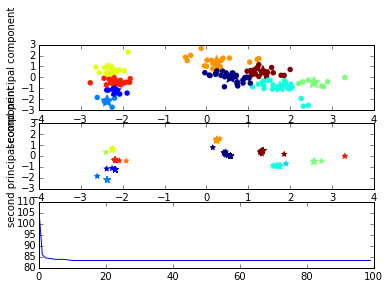

/Users/apple/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


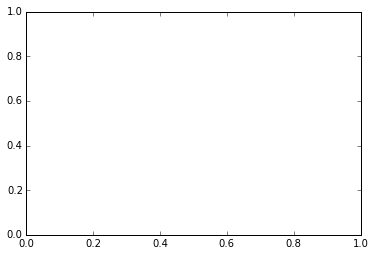

In [3]:
#kmeans_multi
mykmeans_multi = km.mykmeans_multi(10, 100)
mykmeans_multi.mykmeans(X)
centroids = mykmeans_multi.getBestCentroids()
y = mykmeans_multi.getGroup(X, centroids)
centroids_all = mykmeans_multi.getCentroidsOverIteration()
distortions = mykmeans_multi.getDistortionsOverIteration()
km.plotPCA_multi(X, y, centroids, centroids_all, distortions)


# Run kmeans++
* Run kmeans++ and visualize it


Start kmeans
np.array(centers).shape (10, 4)
centers [array([-0.05250608, -0.8191665 ,  0.1941016 , -0.26119297]), array([-0.05250608, -1.05056946,  0.1372359 ,  0.00175297]), array([-0.41600969, -1.51337539, -0.03336121, -0.26119297]), array([ 0.31099753, -1.05056946,  1.04708716,  0.26469891]), array([ 2.4920192 ,  1.72626612,  1.50201279,  1.05353673]), array([-1.62768839, -1.74477836, -1.39813811, -1.18150376]), array([ 1.15917263, -0.1249576 ,  0.99022146,  1.1850097 ]), array([-0.53717756,  0.80065426, -1.17067529, -1.31297673]), array([ 0.06866179, -0.1249576 ,  0.76275864,  0.79059079]), array([ 0.31099753, -0.58776353,  0.1372359 ,  0.13322594])]


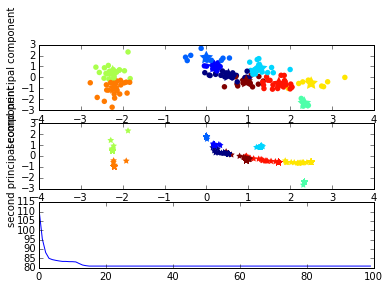

In [14]:
#kmeans_pp
mykmeans_pp = km.mykmeans_pp(10, 100)
mykmeans_pp.mykmeans(X)
centroids = mykmeans_pp.getBestCentroids()
y = mykmeans_pp.getGroup(X, centroids)
centroids_all = mykmeans_pp.getCentroidsOverIteration()
distortions = mykmeans_pp.getDistortionsOverIteration()
km.plotPCA_multi(X, y, centroids, centroids_all, distortions)
